In [2]:
%load_ext autoreload
%autoreload 2

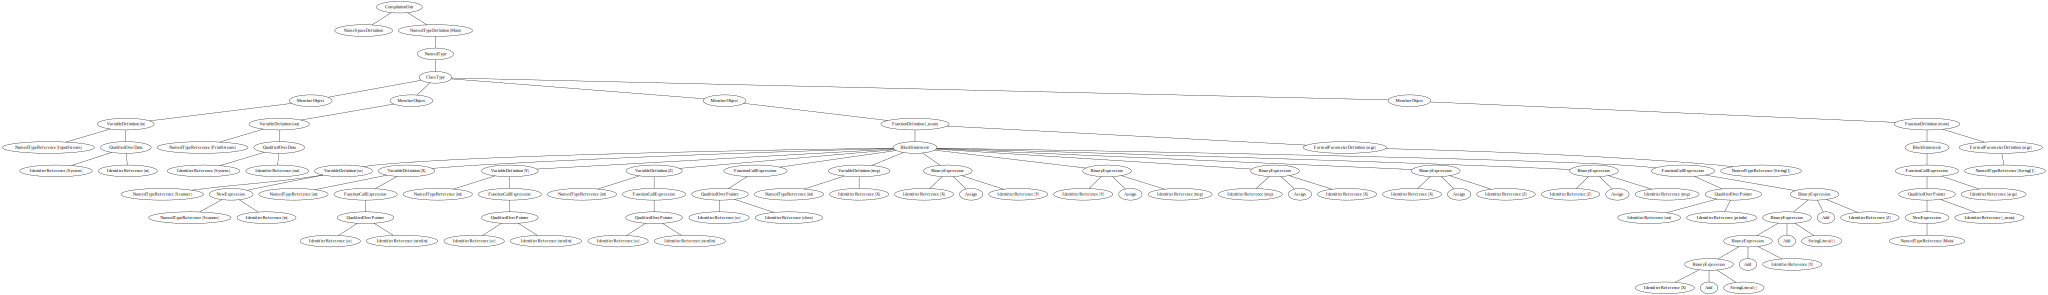

In [3]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\java8_100_300\ai4code_astm\p02717\s000976650.java.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [1]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\java8_100_300\ai4code_problem_class_astm", r"C:\Users\sebas\Documents\Masterarbeit\datasets\1_clean_datasets\java8_100_300\ai4code_astm", 150, 50, 50)

In [5]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02718 ...
... finished p02718
processing p02719 ...
... finished p02719
processing p02723 ...
... finished p02723
processing p02724 ...
... finished p02724
processing p02730 ...
... finished p02730
processing p02731 ...
... finished p02731
processing p02732 ...
... finished p02732
processing p02753 ...
... finished p02753
processing p02754 ...
... finished p02754
processing p02755 ...
... finished p02755
processing p02760 ...
... finished p02760
processing p02761 ...
... finished p02761
processing p02766 ...
... finished p02766
processing p02767 ...
... finished p02767
processing p02771 ...
... finished p02771
processing p02772 ...
... finished p02772
processing p02773 ...
... finished p02773
processing p02783 ...
... finished p02783
processing p02784 ...
... finished p02784
processing p02785 ...
... finished p02785
processing p02790 ...
... finished p02790
processing p02791 ...
... finished p02791
processing p02802 ...
... finished

In [3]:
dataset.get_vocabulary_map()

{'ASTM_UNK': 1,
 'Add': 2,
 'AggregateExpression': 3,
 'And': 4,
 'ArrayAccess': 5,
 'Assign': 6,
 'BinaryExpression': 7,
 'BitAnd': 8,
 'BitLeftShift': 9,
 'BitNot': 10,
 'BitOr': 11,
 'BitRightShift': 12,
 'BitXor': 13,
 'BlockStatement': 14,
 'BooleanLiteral': 15,
 'BreakStatement': 16,
 'CaseBlock': 17,
 'CastExpression': 18,
 'CharLiteral': 19,
 'ClassType': 20,
 'CollectionExpression': 21,
 'CompilationUnit': 22,
 'ConditionalExpression': 23,
 'ContinueStatement': 24,
 'Decrement': 25,
 'DefaultBlock': 26,
 'DerivesFrom': 27,
 'Divide': 28,
 'DoWhileStatement': 29,
 'EmptyStatement': 30,
 'EnumLiteralDefinition': 31,
 'EnumType': 32,
 'Equal': 33,
 'ExpressionFunctionReference': 34,
 'ForCheckBeforeStatement': 35,
 'FormalParameterDefinition': 36,
 'FunctionCallExpression': 37,
 'FunctionDefinition': 38,
 'Greater': 39,
 'IdentifierReference': 40,
 'IfStatement': 41,
 'Increment': 42,
 'IntegerLiteral': 43,
 'LabelDefinition': 44,
 'LabeledStatement': 45,
 'LambdaExpression': 46,

In [4]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [11]:
model.save("./model-save")

INFO:tensorflow:Assets written to: ./model-save\assets


INFO:tensorflow:Assets written to: ./model-save\assets


In [12]:
model = tf.keras.models.load_model("./model-save")

In [13]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

  388/15000 [..............................] - ETA: 3:58 - loss: 2.6037 - categorical_accuracy: 0.4175 - precision: 0.9714 - recall: 0.0876

KeyboardInterrupt: 

In [10]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

 1501/15000 [==>...........................] - ETA: 3:32 - loss: 3.8744 - categorical_accuracy: 0.2052 - precision: 0.8889 - recall: 0.0053

KeyboardInterrupt: 

In [6]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5000/5000 [==============================] - 33s 7ms/step - loss: 0.6223 - categorical_accuracy: 0.8522 - precision: 0.9101 - recall: 0.8156


In [7]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

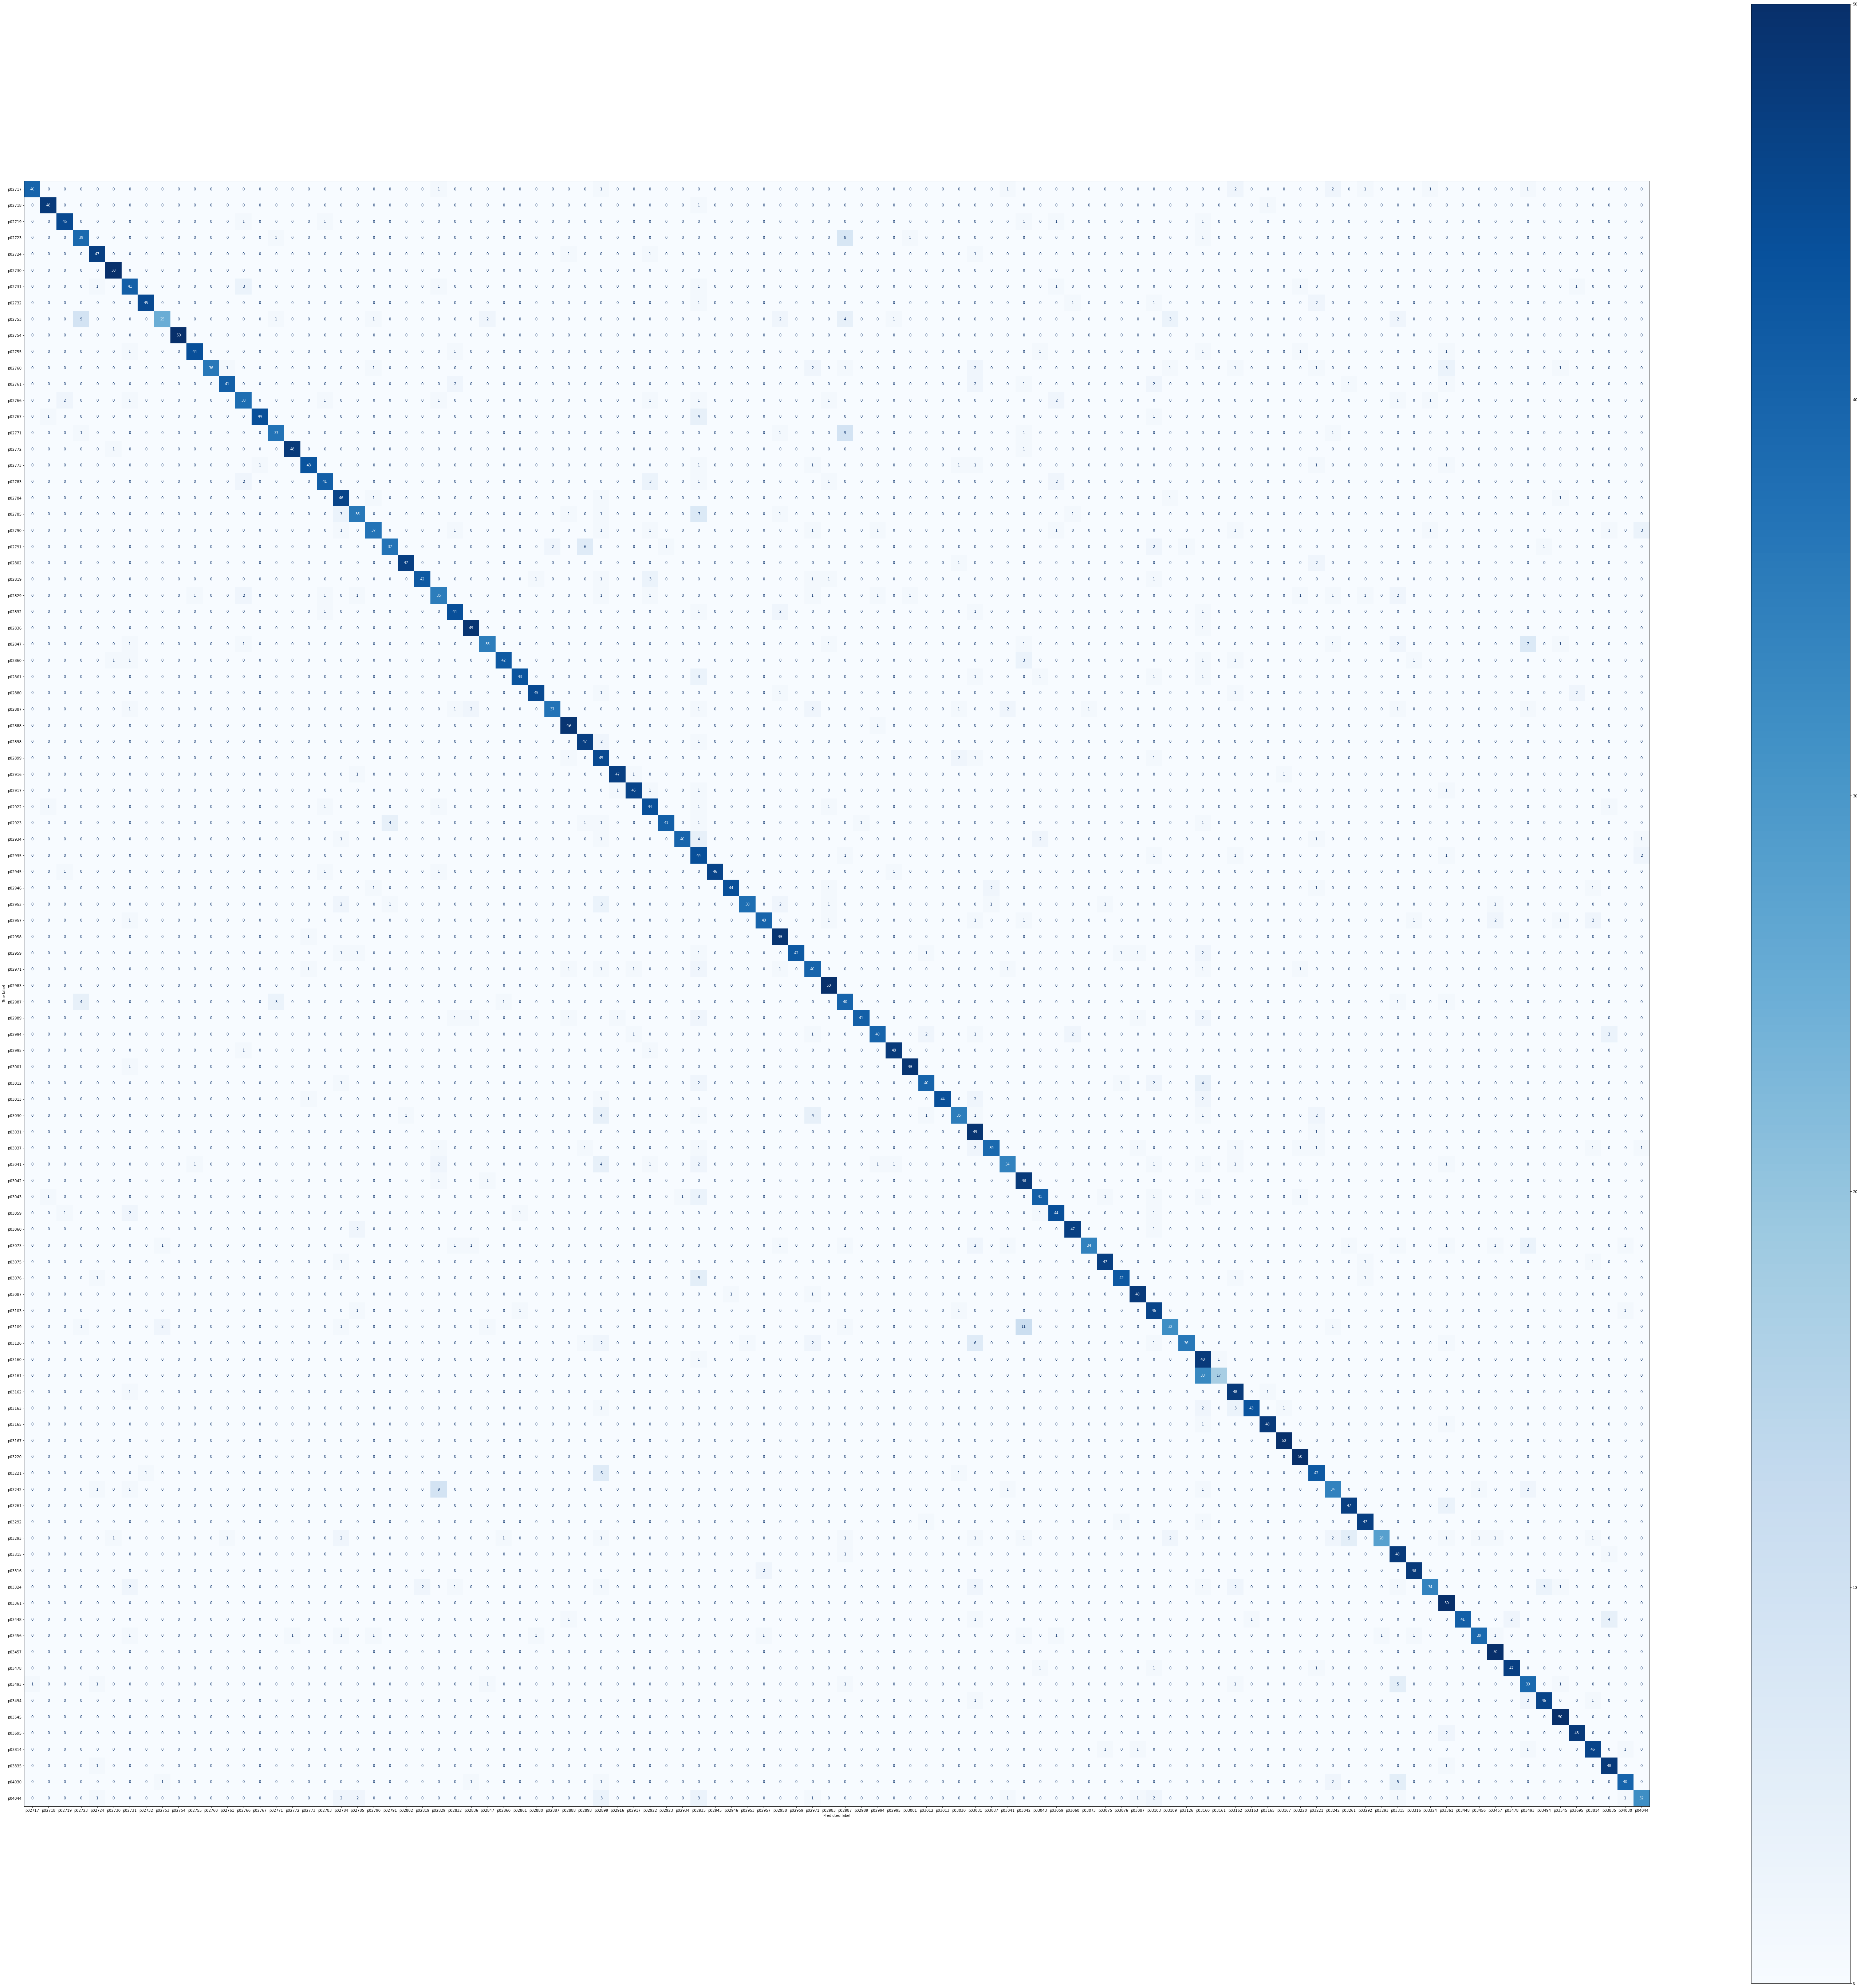

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(100, 100))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(expected_labels, predicted_labels, labels=labels))

              precision    recall  f1-score   support

      p02717       0.98      0.80      0.88        50
      p02718       0.94      0.96      0.95        50
      p02719       0.92      0.90      0.91        50
      p02723       0.72      0.78      0.75        50
      p02724       0.89      0.94      0.91        50
      p02730       0.94      1.00      0.97        50
      p02731       0.75      0.82      0.78        50
      p02732       0.98      0.90      0.94        50
      p02753       0.86      0.50      0.63        50
      p02754       1.00      1.00      1.00        50
      p02755       0.96      0.88      0.92        50
      p02760       1.00      0.72      0.84        50
      p02761       0.95      0.82      0.88        50
      p02766       0.79      0.76      0.78        50
      p02767       0.98      0.88      0.93        50
      p02771       0.88      0.74      0.80        50
      p02772       0.98      0.96      0.97        50
      p02773       0.93    

In [10]:
from collections import Counter
nodes, children = test_generator.__getitem__(0)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
one_hot_node_type_name = nodes[0][0]
node_list = list(dataset.get_vocabulary_map())
node_list[0]
node_list[argmax(one_hot_node_type_name)-1]

'CompilationUnit'

In [11]:
node_list = list(dataset.get_vocabulary_map())
overall_importance = {}
for test_item in test_generator:
    nodes, children = test_item[0]
    conv_filter_activations = model.conv_layer([nodes, children])
    node_importance = model.pooling_layer(conv_filter_activations)[0]
    node_importance_list = node_importance.numpy().tolist()[0]
    counter = Counter(node_importance_list)
    for node_id, value in counter.items():
        one_hot_node_type = nodes[0][node_id]
        node_type = node_list[argmax(one_hot_node_type)-1]
        if node_type in overall_importance:
            overall_importance[node_type] += value
        else:
            overall_importance[node_type] = value

In [12]:
for w in sorted(overall_importance, key=overall_importance.get, reverse=True):
    print(w, overall_importance[w])

CompilationUnit 1553342
BinaryExpression 563841
BlockStatement 272773
FunctionCallExpression 147276
IfStatement 64757
VariableDefinition 44940
ArrayAccess 36248
UnaryExpression 25150
QualifiedOverPointer 24827
NewExpression 24471
ConditionalExpression 17963
Less 13340
Equal 12927
Multiply 12731
Modulus 11299
NotGreater 11212
ForCheckBeforeStatement 10045
NameSpaceDefinition 9917
And 9868
Divide 9505
WhileStatement 8138
Subtract 8116
FunctionDefinition 7982
NotEqual 7747
ReturnStatement 6012
AggregateExpression 5826
NotLess 5791
CastExpression 5127
CharLiteral 5059
MemberObject 5042
IdentifierReference 4999
StringLiteral 4845
Or 3504
PostDecrement 3467
RealLiteral 3411
Add 3379
UnaryMinus 3370
PostIncrement 3320
LambdaExpression 3206
Greater 3082
BooleanLiteral 2718
QualifiedOverData 2660
CaseBlock 2575
BreakStatement 2342
SwitchStatement 1898
ClassType 1501
TryStatement 1311
ContinueStatement 1090
LabeledStatement 773
ThrowStatement 605
Increment 544
BitAnd 514
ExpressionFunctionRefere

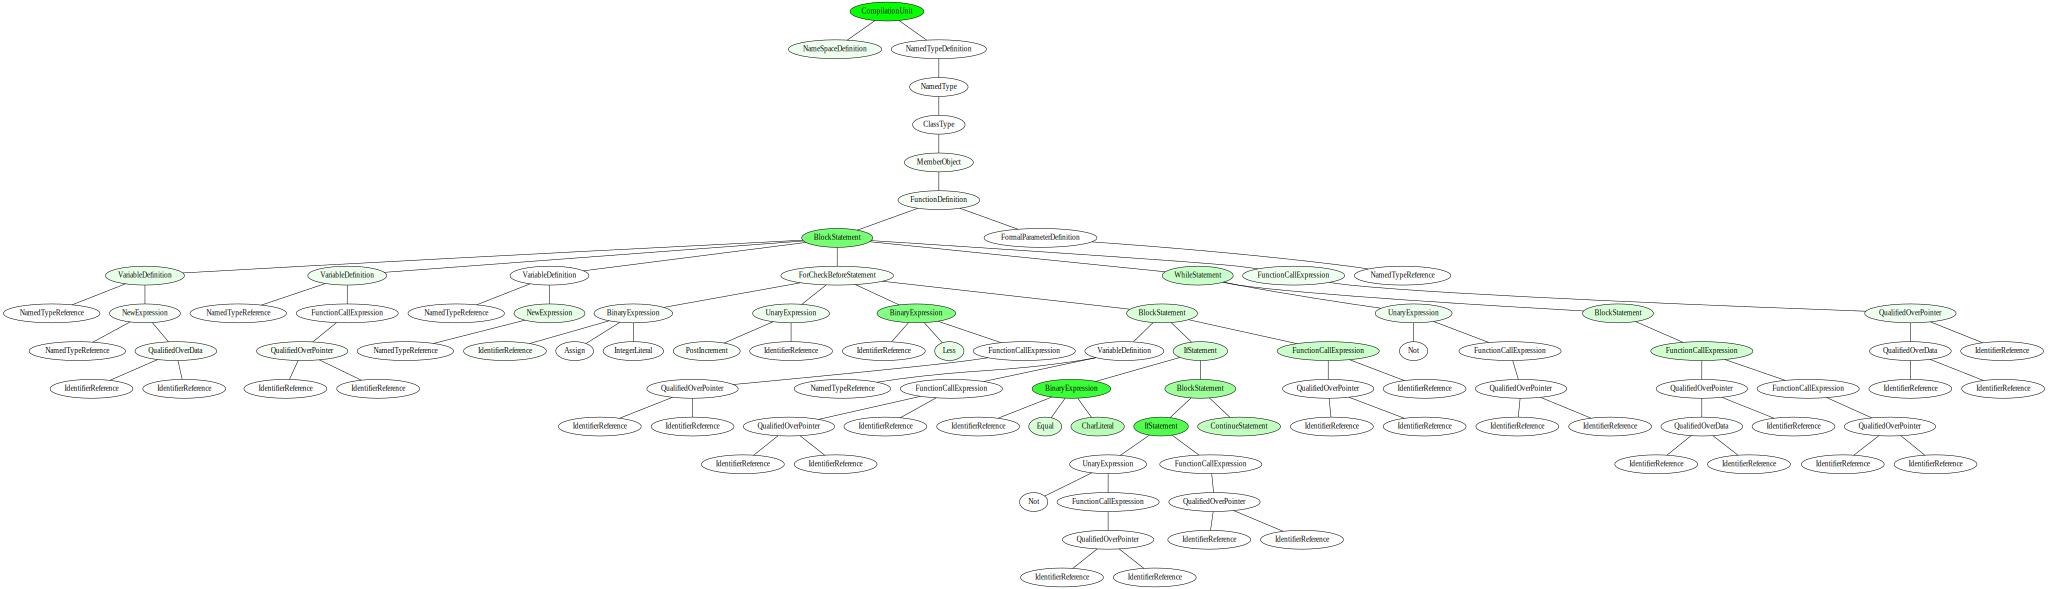

In [13]:
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 1
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)